# Import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, date
from numpy import sqrt, sin, cos, arcsin, arccos, radians, abs

# Import data

In [2]:
dirty_data = pd.read_csv('./dirty_data.csv')
warehouses_data = pd.read_csv('./warehouses.csv')

# Check for null data

In [3]:
dirty_data.isna().sum()

order_id                         0
customer_id                      0
date                             0
nearest_warehouse                0
shopping_cart                    0
order_price                      0
delivery_charges                 0
customer_lat                     0
customer_long                    0
coupon_discount                  0
order_total                      0
season                           0
is_expedited_delivery            0
distance_to_nearest_warehouse    0
latest_customer_review           1
is_happy_customer                0
dtype: int64

# Check for Order ID

In [4]:
print(f'Order id is unique: {dirty_data.order_id.is_unique}')

Order id is unique: True


# Check customer ID

In [5]:
print(f'Customer id is unique: {dirty_data.customer_id.is_unique}')

Customer id is unique: False


In [6]:
dirty_data['customer_id'].unique

<bound method Series.unique of 0      ID6197211592
1      ID0282825849
2      ID0579391891
3      ID4544561904
4      ID6231506320
           ...     
495    ID0247417082
496    ID0130015098
497    ID2707985442
498    ID0060088412
499    ID5257193650
Name: customer_id, Length: 500, dtype: object>

# Check for date

## Check and fix date in wrong format

In [7]:
error_date_index = [i for i in range(len(dirty_data)) if not dirty_data.loc[i,'date'][2].isdecimal()]
print(error_date_index)

[43, 78, 114, 124, 136, 162, 168, 186, 242, 254, 275, 285, 326, 346, 354, 392, 438, 456, 476, 496]


In [8]:
for i in range(len(dirty_data)):
    test_date = dirty_data.loc[i, 'date']
    if not test_date[2].isdecimal():
        if int(test_date[0:2]) in {'Spring':[9, 10, 11], 'Summer':[12, 1, 2], 'Autumn':[3, 4, 5], 'Winter':[6, 7, 8]}.get(dirty_data.loc[i, 'season']):
            dirty_data.loc[i, 'date'] = datetime.strptime(test_date, f'%m{test_date[2]}%d{test_date[2]}%Y').date().__format__('%Y-%m-%d')
        else:
            dirty_data.loc[i, 'date'] = datetime.strptime(test_date, f'%d{test_date[2]}%m{test_date[2]}%Y').date().__format__('%Y-%m-%d')

In [9]:
error_date_index = [i for i in range(len(dirty_data)) if not dirty_data.loc[i,'date'][2].isdecimal()]
print(error_date_index)

[]


In [10]:
dirty_data.dtypes

order_id                          object
customer_id                       object
date                              object
nearest_warehouse                 object
shopping_cart                     object
order_price                        int64
delivery_charges                 float64
customer_lat                     float64
customer_long                    float64
coupon_discount                    int64
order_total                      float64
season                            object
is_expedited_delivery               bool
distance_to_nearest_warehouse    float64
latest_customer_review            object
is_happy_customer                   bool
dtype: object

In [11]:
dirty_data['date'] = pd.to_datetime(dirty_data['date'])

In [12]:
dirty_data.dtypes

order_id                                 object
customer_id                              object
date                             datetime64[ns]
nearest_warehouse                        object
shopping_cart                            object
order_price                               int64
delivery_charges                        float64
customer_lat                            float64
customer_long                           float64
coupon_discount                           int64
order_total                             float64
season                                   object
is_expedited_delivery                      bool
distance_to_nearest_warehouse           float64
latest_customer_review                   object
is_happy_customer                          bool
dtype: object

# Check for season

In [13]:
dirty_data['season'].unique()

array(['Winter', 'Summer', 'Autumn', 'Spring', 'winter', 'spring',
       'autumn', 'summer'], dtype=object)

In [14]:
dirty_data.groupby('season')['date'].count()

season
Autumn    124
Spring    133
Summer    121
Winter    110
autumn      3
spring      1
summer      3
winter      5
Name: date, dtype: int64

In [15]:
error_season:list = [i for i in dirty_data['season'].unique() if i not in ['Spring', 'Summer', 'Autumn', 'Winter']]
print(error_season)

['winter', 'spring', 'autumn', 'summer']


In [16]:
for i in range(len(dirty_data)):
    if dirty_data.loc[i, 'season'] in error_season:
        dirty_data.loc[i, 'season']=dirty_data.loc[i, 'season'].title()

In [17]:
dirty_data.groupby('season')['date'].count()

season
Autumn    127
Spring    134
Summer    124
Winter    115
Name: date, dtype: int64

In [18]:
seasons:dict = {'Spring':[9, 10, 11], 'Summer':[12, 1, 2], 'Autumn':[3, 4, 5], 'Winter':[6, 7, 8]}

In [19]:
error_season = [i for i in range(len(dirty_data)) if dirty_data.loc[i,'date'].month not in seasons.get(dirty_data.loc[i, 'season'])]
print(error_season)

[9, 21, 34, 64, 82, 94, 102, 111, 135, 209, 215, 219, 236, 300, 350, 368, 381, 454, 467, 485]


In [20]:
for i in error_season:
    month = dirty_data.loc[i, 'date'].month
    if month in [9, 10, 11] : season = 'Spring'
    elif month in [12, 1, 2] : season = 'Summer'
    elif month in [3, 4, 5] : season = 'Autumn'
    else : season = 'Winter'
    dirty_data.loc[i, 'season'] = season

In [21]:
error_season = [i for i in range(len(dirty_data)) if dirty_data.loc[i,'date'].month not in seasons.get(dirty_data.loc[i, 'season'])]
print(error_season)

[]


# Check Customer latitude

In [22]:
dirty_data['customer_lat'].describe()

count    500.000000
mean     -35.835234
std       12.045393
min      -37.827123
25%      -37.818222
50%      -37.812165
75%      -37.805364
max       37.826339
Name: customer_lat, dtype: float64

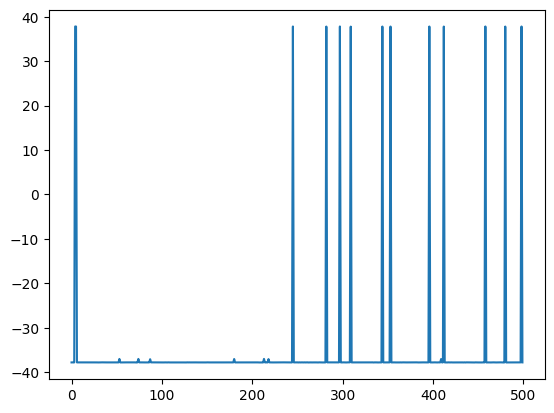

In [23]:
plt.plot(dirty_data['customer_lat'])

(array([487.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  13.]),
 array([-3.78271233e+01, -3.02617770e+01, -2.26964308e+01, -1.51310845e+01,
        -7.56573826e+00, -3.92000000e-04,  7.56495426e+00,  1.51303005e+01,
         2.26956468e+01,  3.02609930e+01,  3.78263393e+01]),
 <BarContainer object of 10 artists>)

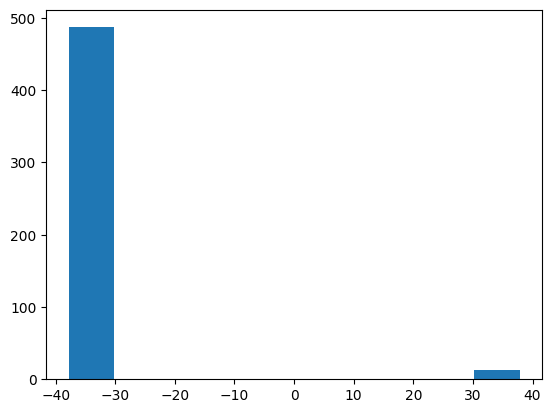

In [24]:
plt.hist(dirty_data['customer_lat'])

<Axes: ylabel='Density'>

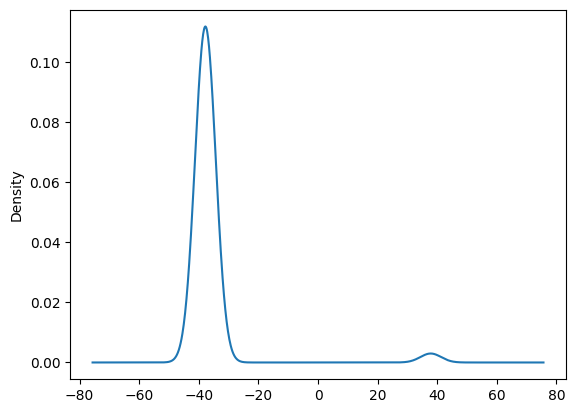

In [25]:
dirty_data['customer_lat'].plot.kde()

In [26]:
lo_lim = dirty_data['customer_lat'].mean() - 1.5*dirty_data['customer_lat'].std()
hi_lim = dirty_data['customer_lat'].mean() + 1.5*dirty_data['customer_lat'].std()
inapproriated_lat = dirty_data['customer_lat'].loc[np.logical_or(dirty_data['customer_lat'] > hi_lim, dirty_data['customer_lat'] < lo_lim)].index.to_list()
print(inapproriated_lat)

[4, 5, 245, 282, 297, 309, 344, 353, 396, 412, 458, 480, 498]


In [27]:
dirty_data.loc[inapproriated_lat, 'customer_lat']

4      37.823859
5      37.820245
245    37.823093
282    37.804518
297    37.826339
309    37.791485
344    37.808119
353    37.810246
396    37.815897
412    37.807469
458    37.823507
480    37.804082
498    37.820071
Name: customer_lat, dtype: float64

# Check for Customer longitude

In [28]:
dirty_data['customer_long'].describe()

count    500.000000
mean     144.969494
std        0.022720
min      144.924967
25%      144.953488
50%      144.965357
75%      144.983985
max      145.019837
Name: customer_long, dtype: float64

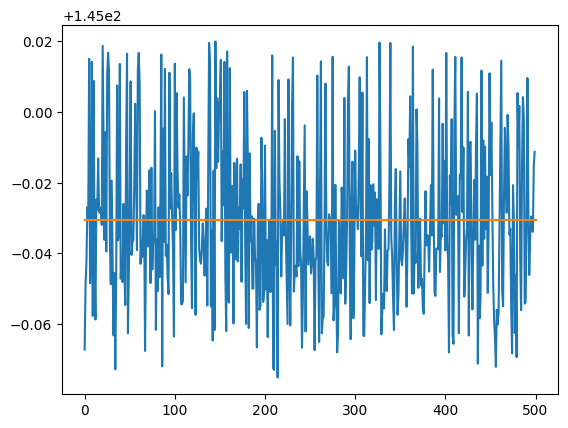

In [29]:
plt.plot(dirty_data['customer_long'])
plt.plot([0, len(dirty_data)], [dirty_data['customer_long'].mean(), dirty_data['customer_long'].mean()])

(array([16., 42., 66., 91., 95., 54., 46., 23., 29., 38.]),
 array([144.9249672 , 144.93445423, 144.94394126, 144.95342829,
        144.96291532, 144.97240235, 144.98188938, 144.99137641,
        145.00086344, 145.01035047, 145.0198375 ]),
 <BarContainer object of 10 artists>)

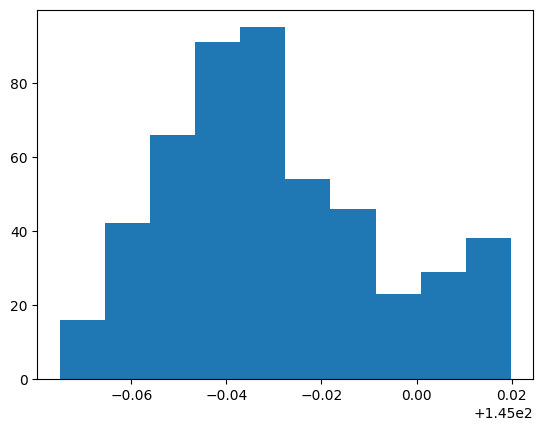

In [30]:
plt.hist(dirty_data['customer_long'])

<Axes: ylabel='Density'>

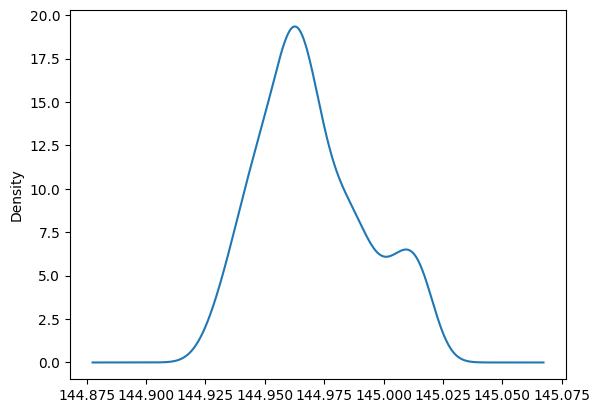

In [73]:
dirty_data['customer_long'].plot.kde()

# Check the nearest warehouse

In [31]:
print(f'Nearest warehouse is unique: {dirty_data.nearest_warehouse.is_unique}')

Nearest warehouse is unique: False


In [32]:
dirty_data['nearest_warehouse'].unique()

array(['Thompson', 'Nickolson', 'Bakers', 'nickolson', 'thompson'],
      dtype=object)

## Fix wrong warehouse's name

In [33]:
error_warehouses:list = [i for i in dirty_data['nearest_warehouse'].dropna().unique() if i not in list(warehouses_data['names'])]
print(error_warehouses)

['nickolson', 'thompson']


In [34]:
for i in range(len(dirty_data)):
    if dirty_data.loc[i, 'nearest_warehouse'] in error_warehouses:
        dirty_data.loc[i, 'nearest_warehouse']=dirty_data.loc[i, 'nearest_warehouse'].title()

In [35]:
dirty_data['nearest_warehouse'].unique()

array(['Thompson', 'Nickolson', 'Bakers'], dtype=object)

## Check if Warehouse is the nearest one

In [36]:
warehouse_check: list = []
true_warehouse: list = []
for i in range(len(dirty_data)):
    [lat, lon] = dirty_data.loc[i, ['customer_lat', 'customer_long']]
    distance = [arccos(sin(radians(lat))*sin(radians(warehouses_data.iloc[t,1])) 
                + cos(radians(lat))*cos(radians(warehouses_data.iloc[t,1]))
                *cos(radians(warehouses_data.iloc[t,2] - lon)))*6371 
                for t in range(3)]
    warehouse = warehouses_data.iloc[distance.index(min(distance)), 0]
    true_warehouse.append(warehouse)
    warehouse_check.append(dirty_data.loc[i, 'nearest_warehouse'] == warehouse)

In [37]:
warehouse_error = [i for i in range(len(warehouse_check)) if not warehouse_check[i]]

In [38]:
warehouse_error = [i for i in warehouse_error if i not in inapproriated_lat] # exclude data cause by the unusal value of customer latitude

In [39]:
for i in warehouse_error:
    dirty_data.loc[i, 'nearest_warehouse'] = true_warehouse[i]

# Check for Distance to nearest warehouse

## Geographic distance between 2 location formula

$\begin{equation} \boxed{ d = \displaystyle 2r \cdot \arcsin{ \sqrt{ \sin{ \left( \frac{lat1 - lat2}{2} \right)}^2 + \cos{\left( lat1 \right)} \cdot \cos{\left(lat2\right)} \cdot \sin{\left( \frac{long1 - long2}{2} \right)}^2}} } \end{equation}$

or 

$\begin{equation} \boxed{d = \displaystyle \arccos{\Big[ \sin{(lat1)} \cdot \sin{(lat2)} + \cos{(lat1)} \cdot \cos{(lat2)} \cdot \cos{(long2 - long1)} \Big] \cdot r} } \end{equation}$

## Check if the distance is correct

In [40]:
dirty_data['distance_to_nearest_warehouse'].describe()

count    500.000000
mean       2.204224
std        8.812416
min        0.107800
25%        0.751425
50%        1.030100
75%        1.408625
max       94.973400
Name: distance_to_nearest_warehouse, dtype: float64

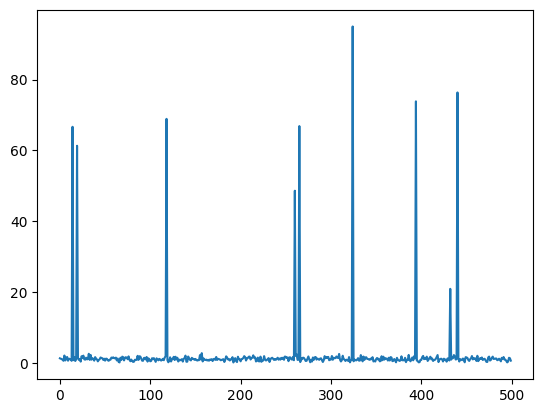

In [41]:
plt.plot(dirty_data['distance_to_nearest_warehouse'])

(array([491.,   0.,   1.,   0.,   0.,   1.,   1.,   4.,   1.,   1.]),
 array([ 0.1078 ,  9.59436, 19.08092, 28.56748, 38.05404, 47.5406 ,
        57.02716, 66.51372, 76.00028, 85.48684, 94.9734 ]),
 <BarContainer object of 10 artists>)

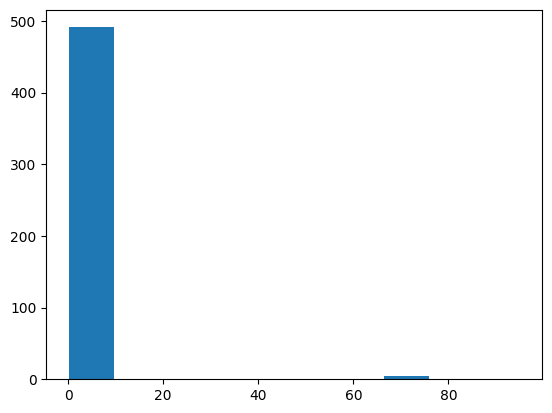

In [42]:
plt.hist(dirty_data['distance_to_nearest_warehouse'])

<Axes: ylabel='Density'>

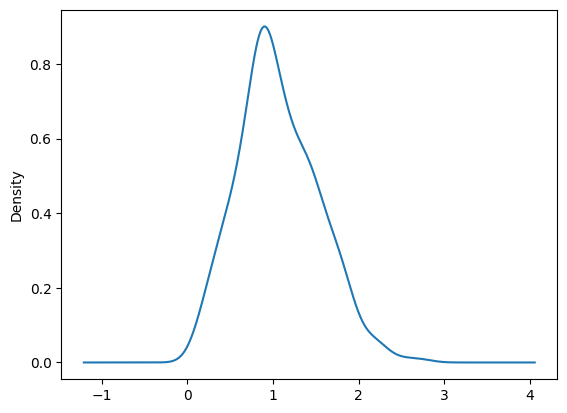

In [72]:
dirty_data['distance_to_nearest_warehouse'].plot.kde()

In [43]:
dis_lo_lim = dirty_data['distance_to_nearest_warehouse'].mean() - 2*dirty_data['distance_to_nearest_warehouse'].std()
dis_hi_lim = dirty_data['distance_to_nearest_warehouse'].mean() + 2*dirty_data['distance_to_nearest_warehouse'].std()
inapproriated_dis = dirty_data['distance_to_nearest_warehouse'].loc[
                    np.logical_or(dirty_data['distance_to_nearest_warehouse'] > dis_hi_lim, 
                                  dirty_data['distance_to_nearest_warehouse'] < dis_lo_lim)].index.to_list()
print(inapproriated_dis)

[14, 19, 118, 260, 265, 324, 394, 432, 440]


In [44]:
dirty_data.loc[inapproriated_dis, 'distance_to_nearest_warehouse']

14     66.6483
19     61.2935
118    68.8892
260    48.5984
265    66.8512
324    94.9734
394    73.8324
432    20.8952
440    76.3419
Name: distance_to_nearest_warehouse, dtype: float64

In [45]:
distance_diff :list = []
warehouses_list = warehouses_data.loc[:, 'names'].to_list()
for i in range(len(dirty_data['distance_to_nearest_warehouse'])):
    [lat1, lon1] = dirty_data.loc[i, ['customer_lat', 'customer_long']]
    [lat2, lon2] = warehouses_data.loc[warehouses_list.index(dirty_data.loc[i, 'nearest_warehouse']), ['lat', 'lon']]
    distance = round(2*6371*np.arcsin(sqrt(np.sin(np.radians((lat1 - lat2)/2))**2 
                     + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(np.radians((lon1-lon2)/2))**2)),4)
    distance_diff.append(abs(dirty_data.loc[i, 'distance_to_nearest_warehouse'] - distance))

In [46]:
distance_diff = pd.DataFrame(distance_diff, columns=['distance_diff'])

In [47]:
distance_diff.describe()

,distance_diff
count,500.000000
mean,220.970861
std,1339.070014
min,0.000100
25%,0.000900
50%,0.001200
75%,0.001725
max,8410.470400


In [48]:
distance_diff.loc[1, 'distance_diff']

0.0012999999999998568

<StemContainer object of 3 artists>

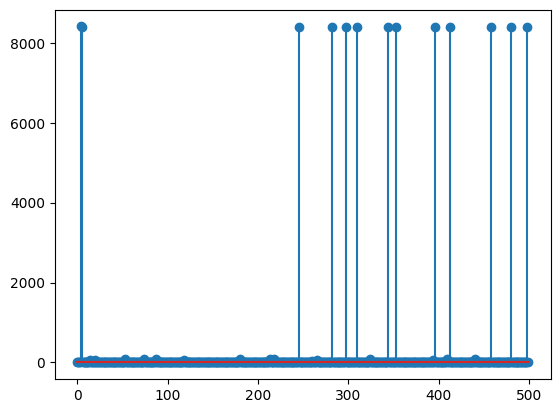

In [49]:
plt.stem(distance_diff)

<Axes: ylabel='Density'>

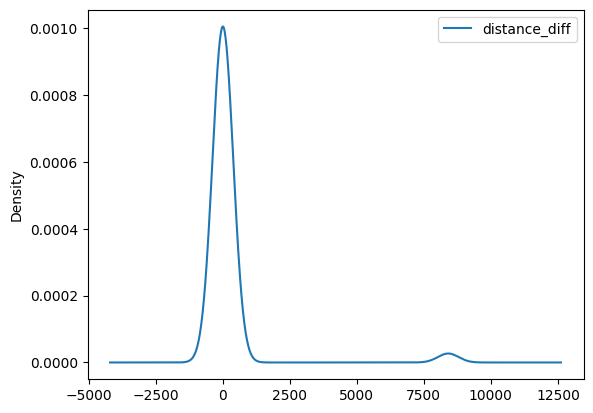

In [71]:
distance_diff.plot.kde()

In [50]:
dis_diff_lo_lim = distance_diff['distance_diff'].mean() - 2*distance_diff['distance_diff'].std()
dis_diff_hi_lim = distance_diff['distance_diff'].mean() + 2*distance_diff['distance_diff'].std()
inapproriated_dis_diff = distance_diff['distance_diff'].loc[
                            np.logical_or(distance_diff['distance_diff'] > dis_diff_hi_lim, 
                                  distance_diff['distance_diff'] < dis_diff_lo_lim)].index.to_list()
print(inapproriated_dis_diff)

[4, 5, 245, 282, 297, 309, 344, 353, 396, 412, 458, 480, 498]


In [51]:
print(f"Number of null value: {distance_diff['distance_diff'].isnull().sum()}")

Number of null value: 0


# Check for Order price

In [52]:
dirty_data['order_price'].describe()

count       500.000000
mean      25522.216000
std       86333.729169
min         585.000000
25%        7050.000000
50%       12807.500000
75%       20360.000000
max      947691.000000
Name: order_price, dtype: float64

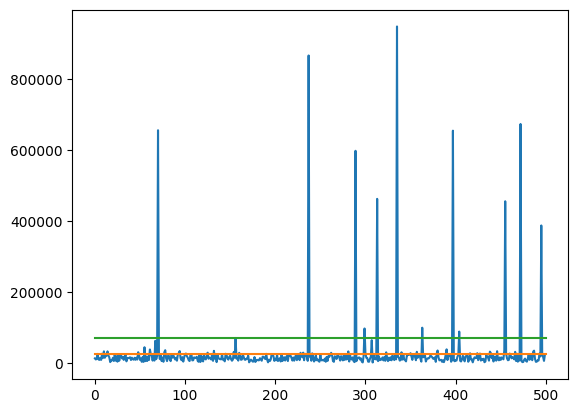

In [53]:
plt.plot(dirty_data['order_price'])
plt.plot([0,len(dirty_data)],[dirty_data['order_price'].mean(), dirty_data['order_price'].mean()])
plt.plot([0,len(dirty_data)], [dirty_data['order_price'].mean() + 0.5*dirty_data['order_price'].std(), dirty_data['order_price'].mean() + 0.5*dirty_data['order_price'].std()])

(array([489.,   2.,   0.,   0.,   3.,   0.,   3.,   1.,   0.,   2.]),
 array([5.850000e+02, 9.529560e+04, 1.900062e+05, 2.847168e+05,
        3.794274e+05, 4.741380e+05, 5.688486e+05, 6.635592e+05,
        7.582698e+05, 8.529804e+05, 9.476910e+05]),
 <BarContainer object of 10 artists>)

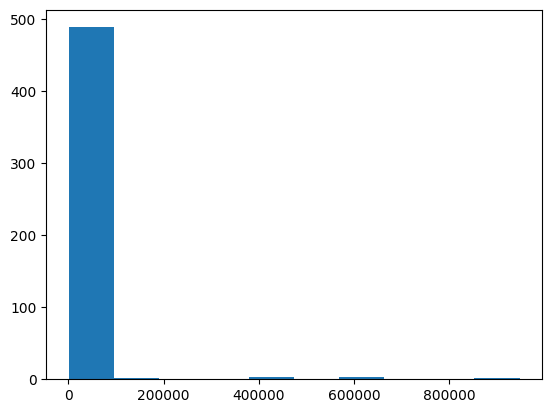

In [54]:
plt.hist(dirty_data['order_price'])

<Axes: ylabel='Density'>

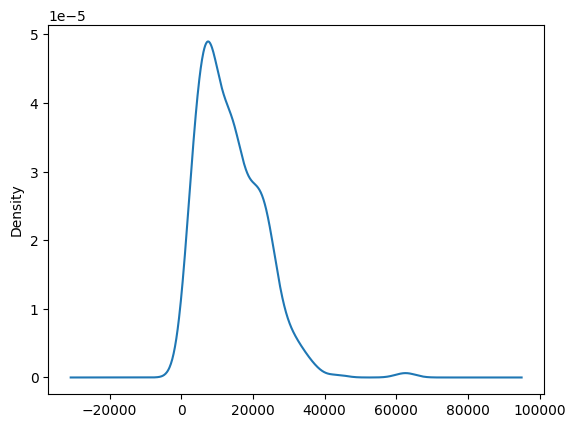

In [70]:
dirty_data['order_price'].plot.kde()

In [55]:
order_lo_lim = dirty_data['order_price'].mean() - 0.5*dirty_data['order_price'].std()
order_hi_lim = dirty_data['order_price'].mean() + 0.5*dirty_data['order_price'].std()
inapproriated_order = dirty_data['order_price'].loc[
                            np.logical_or(dirty_data['order_price'] > order_hi_lim, 
                                          dirty_data['order_price'] < order_lo_lim)].index.to_list()
print(inapproriated_order)

[70, 156, 237, 289, 299, 313, 335, 363, 397, 404, 455, 472, 495]


In [56]:
dirty_data['order_price'].quantile(q=0.9)

25820.000000000015

# Check for Order total

In [57]:
dirty_data['order_total'].describe()

count    5.000000e+02
mean     3.920967e+04
std      2.741940e+05
min      6.392900e+02
25%      6.454735e+03
50%      1.129396e+04
75%      1.811919e+04
max      5.688270e+06
Name: order_total, dtype: float64

In [58]:
dirty_data.order_total.unique

<bound method Series.unique of 0      11059.89
1       9142.71
2       9668.87
3      21137.61
4       6934.29
         ...   
495    20174.70
496    22182.29
497    16596.98
498     4606.89
499    19079.12
Name: order_total, Length: 500, dtype: float64>

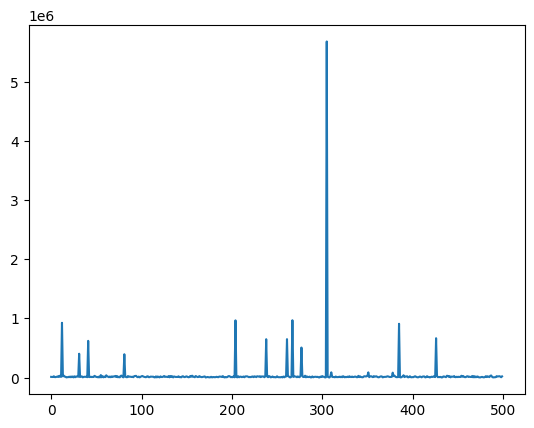

In [59]:
plt.plot(dirty_data['order_total'])

(array([491.,   8.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([6.39290000e+02, 5.69402321e+05, 1.13816535e+06, 1.70692838e+06,
        2.27569141e+06, 2.84445444e+06, 3.41321748e+06, 3.98198051e+06,
        4.55074354e+06, 5.11950657e+06, 5.68826960e+06]),
 <BarContainer object of 10 artists>)

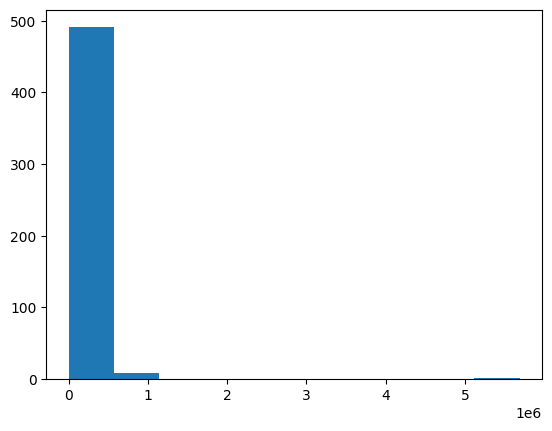

In [60]:
plt.hist(dirty_data['order_total'])

<Axes: ylabel='Density'>

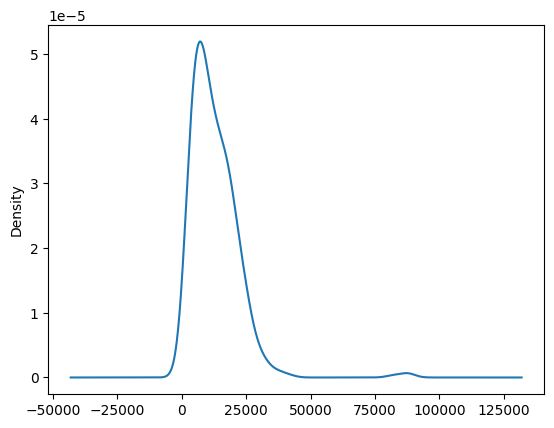

In [74]:
dirty_data['order_total'].plot.kde()

In [61]:
ordertotal_lo_lim = dirty_data['order_total'].mean() - 0.5*dirty_data['order_total'].std()
ordertotal_hi_lim = dirty_data['order_total'].mean() + 0.5*dirty_data['order_total'].std()
inapproriated_ordertotal = dirty_data['order_total'].loc[
                            np.logical_or(dirty_data['order_total'] > ordertotal_hi_lim, 
                                          dirty_data['order_total'] < ordertotal_lo_lim)].index.to_list()
print(inapproriated_ordertotal)

[12, 31, 41, 81, 204, 238, 261, 267, 277, 305, 385, 426]


# Drop inapproriate

Text(0.5, 1.0, 'distance_to_nearest_warehouse')

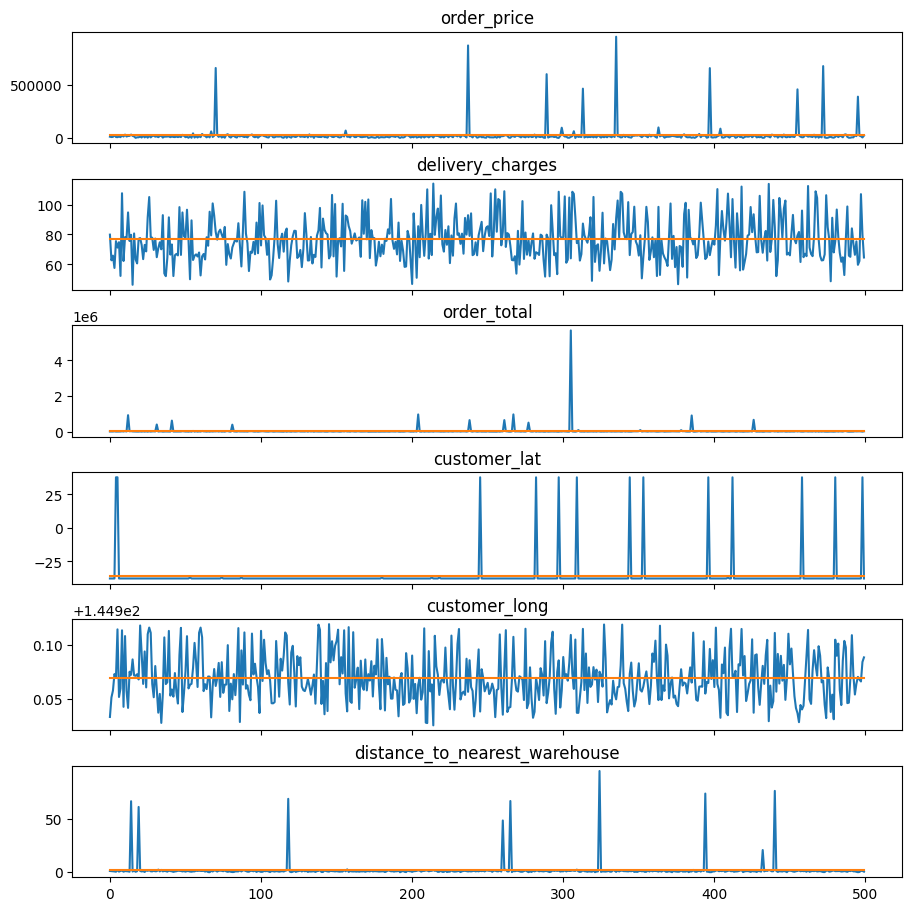

In [62]:
fig, (ax0, ax1, ax2, ax3, ax4, ax5) = plt.subplots(6, 1, figsize=(9,9), layout='constrained', sharex=True)
ax0.plot(dirty_data['order_price'])
ax0.plot([0,len(dirty_data)-1], [dirty_data['order_price'].mean(), dirty_data['order_price'].mean()])
ax0.set_title('order_price')

ax1.plot(dirty_data['delivery_charges'])
ax1.plot([0,len(dirty_data)-1], [dirty_data['delivery_charges'].mean(), dirty_data['delivery_charges'].mean()])
ax1.set_title('delivery_charges')

ax2.plot(dirty_data['order_total'])
ax2.plot([0,len(dirty_data)-1], [dirty_data['order_total'].mean(), dirty_data['order_total'].mean()])
ax2.set_title('order_total')

ax3.plot(dirty_data['customer_lat'])
ax3.plot([0,len(dirty_data)-1], [dirty_data['customer_lat'].mean(), dirty_data['customer_lat'].mean()])
ax3.set_title('customer_lat')

ax4.plot(dirty_data['customer_long'])
ax4.plot([0,len(dirty_data)-1], [dirty_data['customer_long'].mean(), dirty_data['customer_long'].mean()])
ax4.set_title('customer_long')

ax5.plot(dirty_data['distance_to_nearest_warehouse'])
ax5.plot([0,len(dirty_data)-1], [dirty_data['distance_to_nearest_warehouse'].mean(), dirty_data['distance_to_nearest_warehouse'].mean()])
ax5.set_title('distance_to_nearest_warehouse')

In [63]:
print(inapproriated_lat)
print(inapproriated_dis)
print(inapproriated_dis_diff)
print(inapproriated_order)
print(inapproriated_ordertotal)

[4, 5, 245, 282, 297, 309, 344, 353, 396, 412, 458, 480, 498]
[14, 19, 118, 260, 265, 324, 394, 432, 440]
[4, 5, 245, 282, 297, 309, 344, 353, 396, 412, 458, 480, 498]
[70, 156, 237, 289, 299, 313, 335, 363, 397, 404, 455, 472, 495]
[12, 31, 41, 81, 204, 238, 261, 267, 277, 305, 385, 426]


In [64]:
inapproriated_data:list = []
inapproriated_data.extend(inapproriated_lat)
inapproriated_data.extend(inapproriated_dis)
inapproriated_data.extend(inapproriated_dis_diff)
inapproriated_data.extend(inapproriated_order)
inapproriated_data.extend(inapproriated_ordertotal)

In [65]:
inapproriated_data = sorted(list(dict.fromkeys(inapproriated_data)))

In [66]:
print(inapproriated_data)

[4, 5, 12, 14, 19, 31, 41, 70, 81, 118, 156, 204, 237, 238, 245, 260, 261, 265, 267, 277, 282, 289, 297, 299, 305, 309, 313, 324, 335, 344, 353, 363, 385, 394, 396, 397, 404, 412, 426, 432, 440, 455, 458, 472, 480, 495, 498]


In [67]:
dirty_data = dirty_data.drop(inapproriated_data)

Text(0.5, 1.0, 'distance_to_nearest_warehouse')

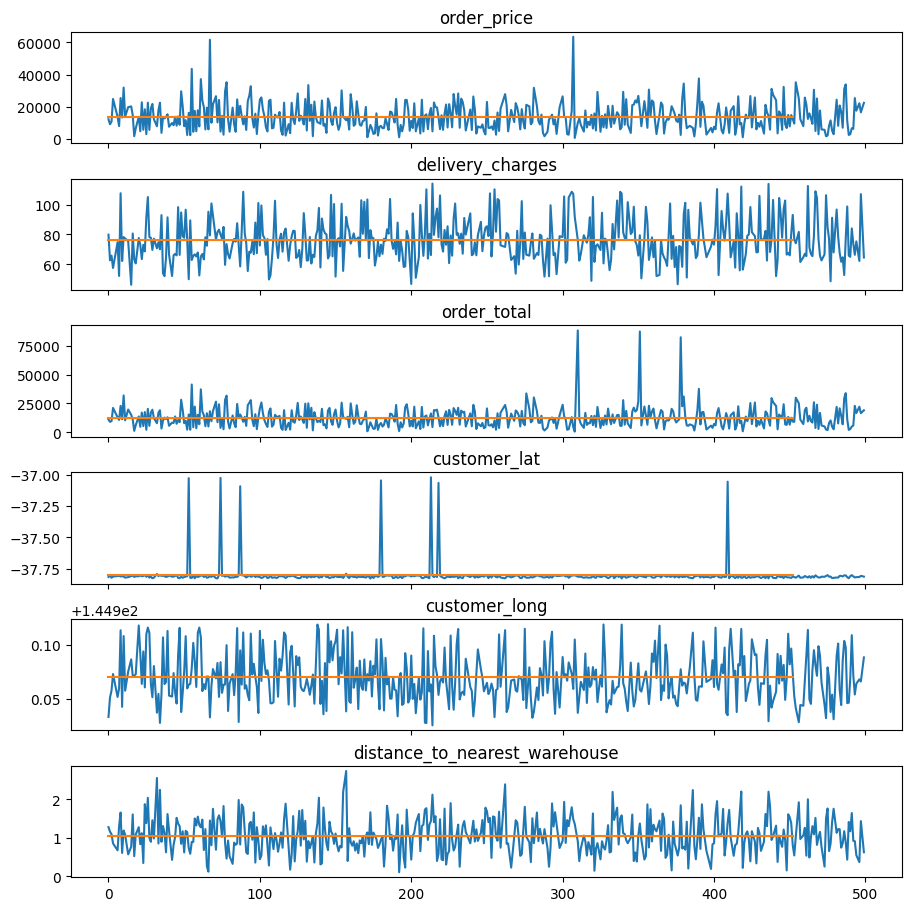

In [68]:
fig, (ax0, ax1, ax2, ax3, ax4, ax5) = plt.subplots(6, 1, figsize=(9,9), layout='constrained', sharex=True)
ax0.plot(dirty_data['order_price'])
ax0.plot([0,len(dirty_data)-1], [dirty_data['order_price'].mean(), dirty_data['order_price'].mean()])
ax0.set_title('order_price')

ax1.plot(dirty_data['delivery_charges'])
ax1.plot([0,len(dirty_data)-1], [dirty_data['delivery_charges'].mean(), dirty_data['delivery_charges'].mean()])
ax1.set_title('delivery_charges')

ax2.plot(dirty_data['order_total'])
ax2.plot([0,len(dirty_data)-1], [dirty_data['order_total'].mean(), dirty_data['order_total'].mean()])
ax2.set_title('order_total')

ax3.plot(dirty_data['customer_lat'])
ax3.plot([0,len(dirty_data)-1], [dirty_data['customer_lat'].mean(), dirty_data['customer_lat'].mean()])
ax3.set_title('customer_lat')

ax4.plot(dirty_data['customer_long'])
ax4.plot([0,len(dirty_data)-1], [dirty_data['customer_long'].mean(), dirty_data['customer_long'].mean()])
ax4.set_title('customer_long')

ax5.plot(dirty_data['distance_to_nearest_warehouse'])
ax5.plot([0,len(dirty_data)-1], [dirty_data['distance_to_nearest_warehouse'].mean(), dirty_data['distance_to_nearest_warehouse'].mean()])
ax5.set_title('distance_to_nearest_warehouse')